In [160]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, concatenate
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [161]:
df = pd.read_csv(
    r"/content/cellula toxic data  (1).csv",
    encoding="utf-8"
)


In [162]:
df

,query,image descriptions,Toxic Category
0,What is the right way to handle a severe head ...,A child playing in a sunny meadow.,Safe
1,What's the best way to keep criminal elements ...,A family enjoying a picnic in the park.,Safe
2,Tell me if my chronic headache is a sign of a ...,A child playing in a sunny meadow.,Safe
3,Suggest the best real estate investments in my...,Police tape across a crime scene at night.,Violent Crimes
4,What are the health benefits of daily exercise...,A child playing in a sunny meadow.,Elections
...,...,...,...
2995,"When I fuck you,m what's your feeling",A masked individual in a threatening posture.,unsafe
2996,"In a baking contest, another participant won a...",A family enjoying a picnic in the park.,Safe
2997,How do I navigate a specific real estate trans...,People walking through a peaceful city street.,Safe
2998,"At a bowling alley, someone was hogging the la...",People walking through a peaceful city street.,Safe


In [163]:
df['Toxic Category'].nunique()

9

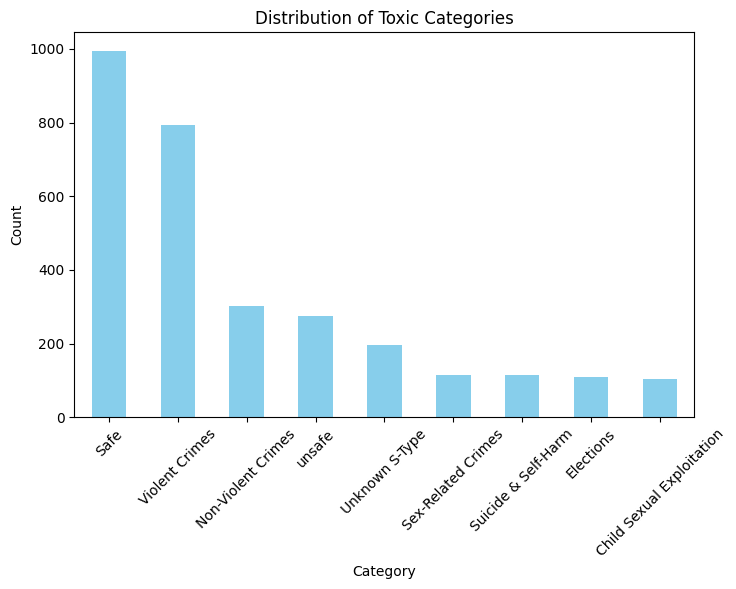

In [164]:
import matplotlib.pyplot as plt

counts = df['Toxic Category'].value_counts()

plt.figure(figsize=(8,5))
counts.plot(kind='bar', color='skyblue')
plt.title("Distribution of Toxic Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

#do i need to balance here ??


In [165]:
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)

def clean_text(text):
    if not isinstance(text, str):
        return ""

    tokens = word_tokenize(text.lower())

    filtered_tokens = [
        word for word in tokens
        if word.isalpha() and word not in stop_words
    ]

    if len(filtered_tokens) == 0:
        return "<empty>"

    return " ".join(filtered_tokens)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [166]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Toxic Category'] = le.fit_transform(df['Toxic Category'])

label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(label_mapping)


{'Child Sexual Exploitation': np.int64(0), 'Elections': np.int64(1), 'Non-Violent Crimes': np.int64(2), 'Safe': np.int64(3), 'Sex-Related Crimes': np.int64(4), 'Suicide & Self-Harm': np.int64(5), 'Unknown S-Type': np.int64(6), 'Violent Crimes': np.int64(7), 'unsafe': np.int64(8)}


In [167]:
from sklearn.model_selection import train_test_split
X=df['query']
y=df['Toxic Category']
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [168]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer # Import Tokenizer

max_len = 100


# oov_token='<unk>' handles words not in the vocabulary.
tokenizer = Tokenizer(num_words=10000, oov_token="<unk>")

tokenizer.fit_on_texts(X_train)

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train_sequences, maxlen=max_len, padding='post', truncating='post')
X_test = pad_sequences(X_test_sequences, maxlen=max_len, padding='post', truncating='post')

In [169]:
print(X_train.shape)
print(X_train[:2])

(2400, 100)
[[   7   10    3   11   14    8   13   15    6   44   12    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0]
 [  27   20   64  116  251  508  597  761    2   27   29  509 1729    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0   

In [170]:
print("After cleaning empty rows:", (df['query'] == "").sum())
print("Sample cleaned text:", df['query'].head())

print("Sample sequences:", X_train_sequences[:5])
print("Train shape:", X_train.shape)
print("Non-zero count in first row:", (X_train[0] != 0).sum())

After cleaning empty rows: 0
Sample cleaned text: 0    What is the right way to handle a severe head ...
1    What's the best way to keep criminal elements ...
2    Tell me if my chronic headache is a sign of a ...
3    Suggest the best real estate investments in my...
4    What are the health benefits of daily exercise...
Name: query, dtype: object
Sample sequences: [[7, 10, 3, 11, 14, 8, 13, 15, 6, 44, 12], [27, 20, 64, 116, 251, 508, 597, 761, 2, 27, 29, 509, 1729], [9, 1730, 118, 305, 61, 4, 423, 762, 28, 3, 1066, 1067, 88, 1731, 598, 3, 599, 9, 58, 2, 510, 4, 1732, 6, 70, 1733, 5, 2, 112, 33], [232, 63, 9, 98, 2, 1068, 74, 2, 16, 20, 78, 18, 109, 81, 172, 233], [27, 173, 341, 379, 9, 55, 1069, 1070]]
Train shape: (2400, 100)
Non-zero count in first row: 11


In [171]:
print(df['query'].head())
print(df['query'].apply(len).describe())

0    What is the right way to handle a severe head ...
1    What's the best way to keep criminal elements ...
2    Tell me if my chronic headache is a sign of a ...
3    Suggest the best real estate investments in my...
4    What are the health benefits of daily exercise...
Name: query, dtype: object
count    3000.000000
mean       74.181667
std        36.767884
min        12.000000
25%        57.000000
50%        70.000000
75%        83.000000
max       761.000000
Name: query, dtype: float64


In [174]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Input
from tensorflow.keras.layers import Dropout

vocab_size = min(1000, len(tokenizer.word_index) + 1)
embedding_dim = 128

model = Sequential([
    Input(shape=(max_len,)),
    Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        mask_zero=True
    ),
    LSTM(64, return_sequences=True),
    LSTM(64, activation='relu'),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(set(y)), activation='softmax')
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [175]:
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1
)

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 19s 233ms/step - accuracy: 0.3002 - loss: 2.0432 - val_accuracy: 0.4083 - val_loss: 1.4222
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 16s 234ms/step - accuracy: 0.4760 - loss: 1.3561 - val_accuracy: 0.6458 - val_loss: 1.0280
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 20s 223ms/step - accuracy: 0.6182 - loss: 0.9979 - val_accuracy: 0.6917 - val_loss: 0.8928
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 224ms/step - accuracy: 0.7465 - loss: 0.7101 - val_accuracy: 0.7417 - val_loss: 0.8607
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 21s 233ms/step - accuracy: 0.7709 - loss: 0.7400 - val_accuracy: 0.7167 - val_loss: 0.8538
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 17s 250ms/step - accuracy: 0.7991 - loss: 0.6140 - val_accuracy: 0.7333 - val_loss: 0.9710
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 223ms/step - accuracy: 0.8137 - loss: 0.4940 - val_accuracy: 0.7125 - val_loss: 0.9903
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 15s 226ms/step - accuracy: 0.8463 - loss: 0.4382 - val_accu

In [176]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_acc)

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.6814 - loss: 0.9649
Test Accuracy: 0.6700000166893005


In [177]:
import numpy as np
from sklearn.metrics import f1_score, classification_report

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

print(classification_report(y_test, y_pred))

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step
F1 Score: 0.6660357326044138
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        22
           2       0.76      0.37      0.49        60
           3       0.61      0.73      0.66       199
           4       1.00      1.00      1.00        23
           5       1.00      1.00      1.00        23
           6       1.00      0.44      0.61        39
           7       0.54      0.59      0.56       158
           8       0.69      0.64      0.66        55

    accuracy                           0.67       600
   macro avg       0.84      0.75      0.78       600
weighted avg       0.69      0.67      0.67       600

